XGBoost Regressor – With kagglehub Dataset Load

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

In [16]:
# Load and clean
csv_path = "/content/financials.csv"
df = pd.read_csv(csv_path)
df = df.drop(columns=['Symbol', 'Name', 'SEC Filings'])
df = df.dropna()
df = pd.get_dummies(df, columns=['Sector'], drop_first=True)

In [17]:
# Prepare data
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [18]:
# Predict and evaluate
y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = xgb_mse ** 0.5
xgb_r2 = r2_score(y_test, y_pred)
print("XGBoost RMSE:", xgb_rmse)
print("XGBoost R²:", xgb_r2)

XGBoost RMSE: 50.417081987249134
XGBoost R²: 0.8858861258959192


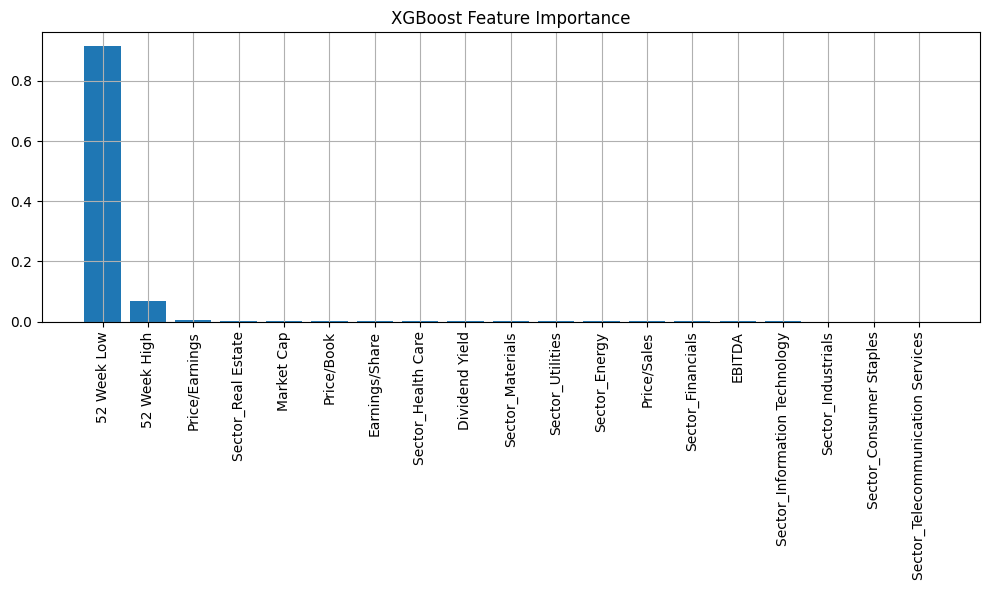

In [19]:
# Feature Importance
importances = xgb_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.grid(True)
plt.show()

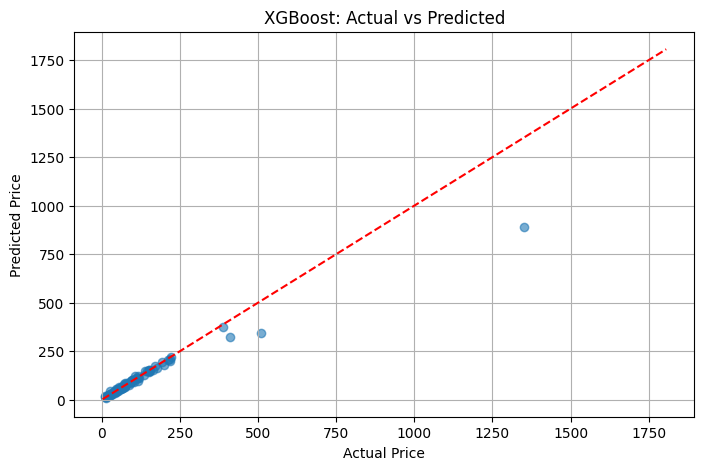

In [20]:
# Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBoost: Actual vs Predicted")
plt.grid(True)
plt.show()